<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_set_2020/blob/master/05_ANN_build_PSD_set_09_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
import zipfile
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
!pip install mahotas

In [3]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [5]:
# 03_ANN_NEW_DATA... only the grains in 882 are used for training 
#                    the ANN and segmented images are used to 
#                    train no-grain

# 03_ANN_NEW_DATA... only the grains in 882 are used for training the ANN and segmented images are used to train no-grain

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado


# First step: get the segmented file (photos stored in csv file)

In [7]:
labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

In [8]:
Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

y_valor=df['Type']

In [9]:
#print(df.head())

In [10]:
print(df)

      Unnamed: 0 Type          0  ...        782        783  Width
0              0    G    0.00000  ...    0.68631    0.68769    NaN
1              1    G    0.00000  ...    0.49262    0.50909    NaN
2              2    G    0.45321  ...    0.54919    0.55439    NaN
3              3    G    0.75367  ...    0.48524    0.61876    NaN
4              4    G    0.94521  ...    0.98108    0.95838    NaN
...          ...  ...        ...  ...        ...        ...    ...
1627          45    Z  146.27896  ...  177.99518  193.41644  158.0
1628          46    Z  189.54553  ...  174.20529  186.79413  178.0
1629          47    Z   77.16447  ...   68.11906   61.99939  121.0
1630          48    Z   93.59823  ...  157.16385  144.35010  186.0
1631          49    Z  110.17294  ...  128.05782   96.93800  199.0

[1632 rows x 787 columns]


In [11]:
quantidade= df.groupby('Type').size()
print(quantidade)

Type
B    180
G    245
I    180
N    115
V    162
Z    750
dtype: int64


In [12]:
df_G = df[df["Type"] == "G"] 
Cut=['Unnamed: 0','Type','Width']
FotosG= df_G.drop(Cut,axis=1)
#print(FotosG)

In [13]:
Size=28
img_G=[]
# FotosZ= np.array(FotosZ)

Num,cols=FotosG.shape
for i in range(Num):
  data=np.array(FotosG.iloc[i]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img_G.append(img28)

In [14]:
df_Z = df[df["Type"] == "Z"] 
Cut=['Unnamed: 0','Type','Width']
FotosZ= df_Z.drop(Cut,axis=1)
print(FotosZ)

              0          1          2  ...        781        782        783
882    99.66225  102.53902  105.61966  ...    0.00000    0.00000    0.00000
883    76.92050   71.22499   74.38184  ...   74.69497   74.31098   71.98919
884    93.92000   91.24000   73.32000  ...    0.00000    0.00000    0.00000
885    73.05943   80.09882   82.46129  ...  100.20395  109.51174  120.26761
886   122.86490  123.56383  124.44763  ...  100.99214   96.51134   90.73105
...         ...        ...        ...  ...        ...        ...        ...
1627  146.27896  149.26598  153.09581  ...  161.62216  177.99518  193.41644
1628  189.54553  211.03372  230.51788  ...  167.19521  174.20529  186.79413
1629   77.16447   76.29322   74.31848  ...   69.47470   68.11906   61.99939
1630   93.59823   93.16210   92.73212  ...  159.58344  157.16385  144.35010
1631  110.17294  121.77184  133.03445  ...  134.67851  128.05782   96.93800

[750 rows x 784 columns]


In [15]:
# We'll choose which is grain and withdraw from 750 segmented photos

In [16]:
Size=28
img_Z=[]
# FotosZ= np.array(FotosZ)

Num,cols=FotosZ.shape
for i in range(Num):
  data=np.array(FotosZ.iloc[i]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img_Z.append(img28)


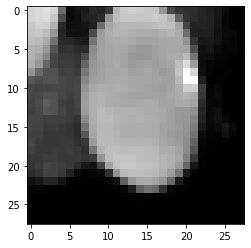

In [17]:
Foto=np.array(img_Z[0]).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

' '

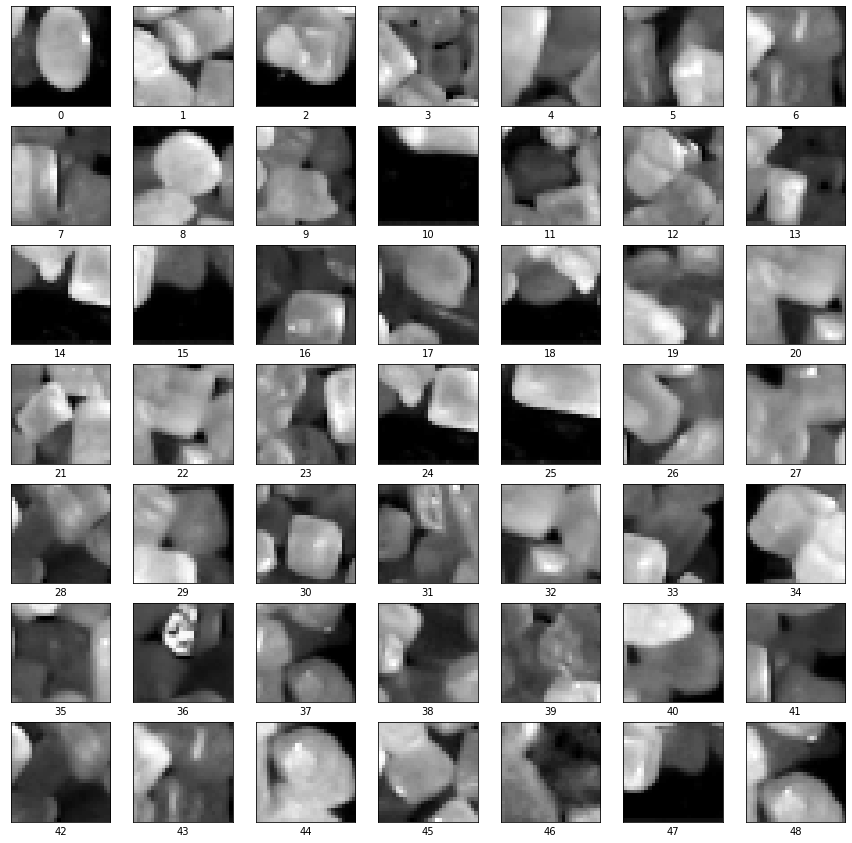

In [18]:
plt.figure(figsize=(15,15))
Num=49
for i in range(Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
''' '''

In [19]:
GRAO=[0]

' '

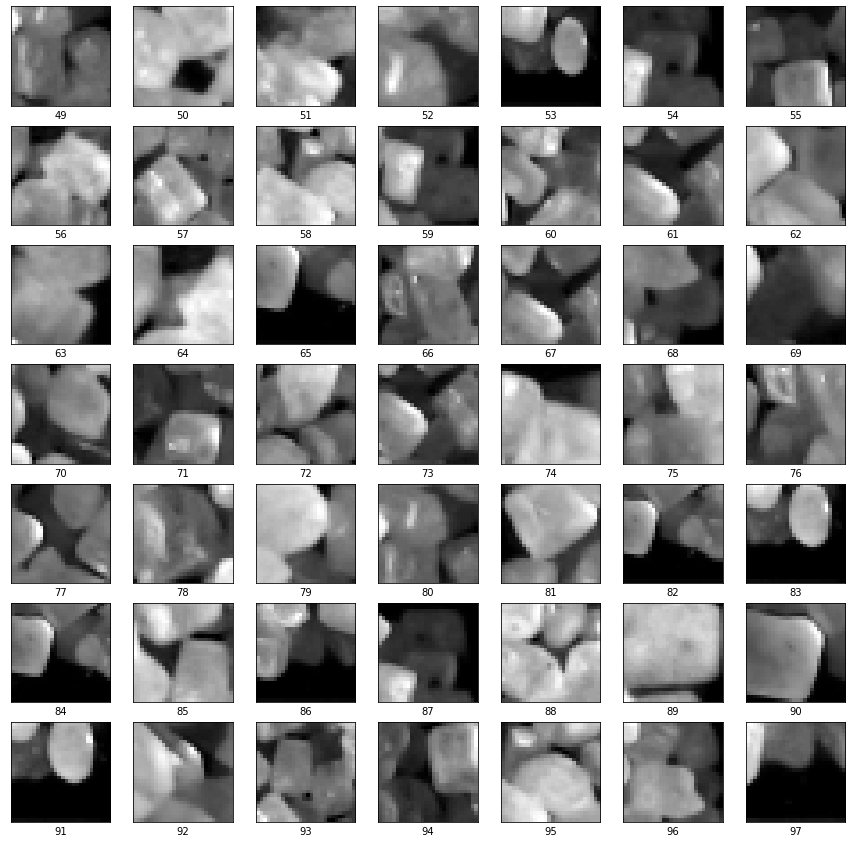

In [20]:
plt.figure(figsize=(15,15))
i=1
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
''' '''

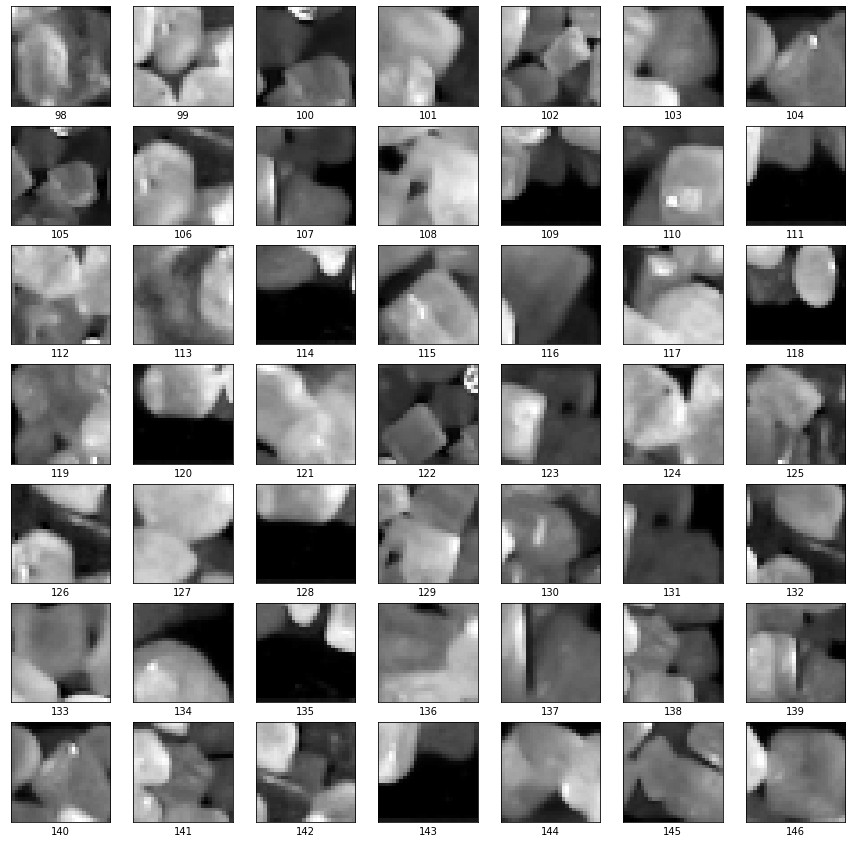

In [21]:
plt.figure(figsize=(15,15))
i=2
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)

In [22]:
GRAO=[0,146] # 0 ate 146

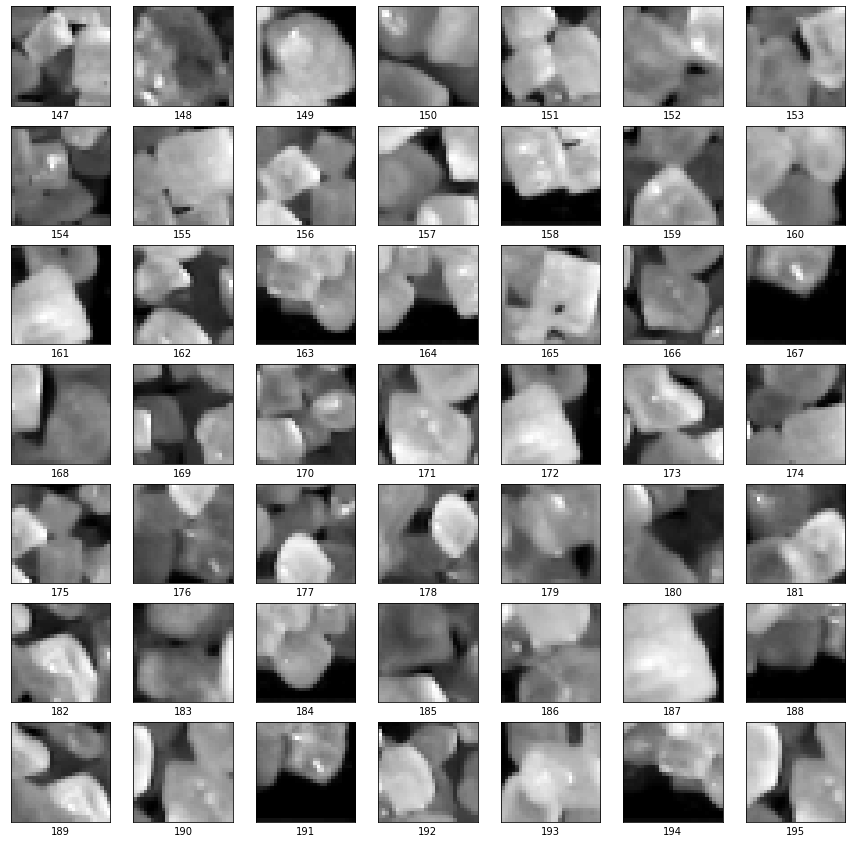

In [23]:
plt.figure(figsize=(15,15))
i=3
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 146

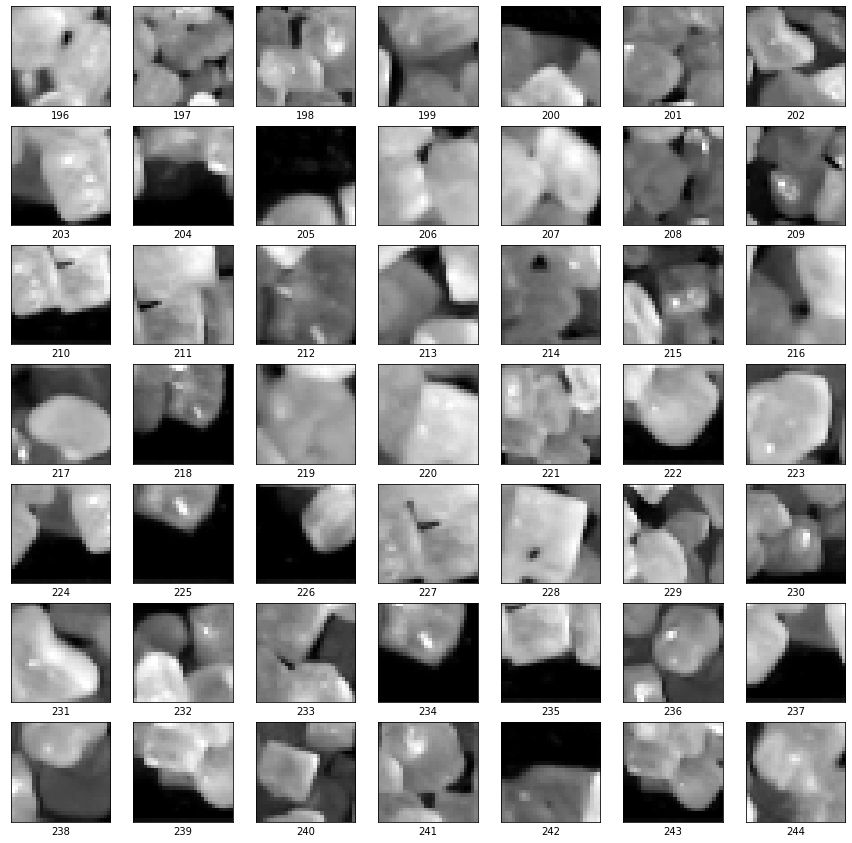

In [24]:
plt.figure(figsize=(15,15))
i=4
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 284

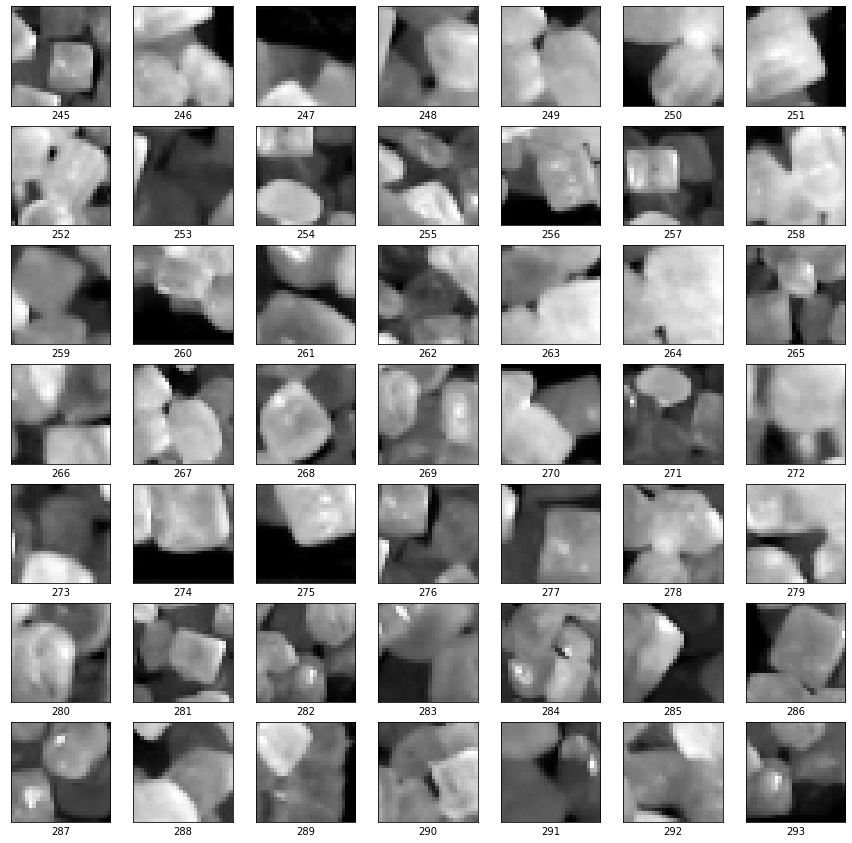

In [25]:
plt.figure(figsize=(15,15))
i=5
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 284

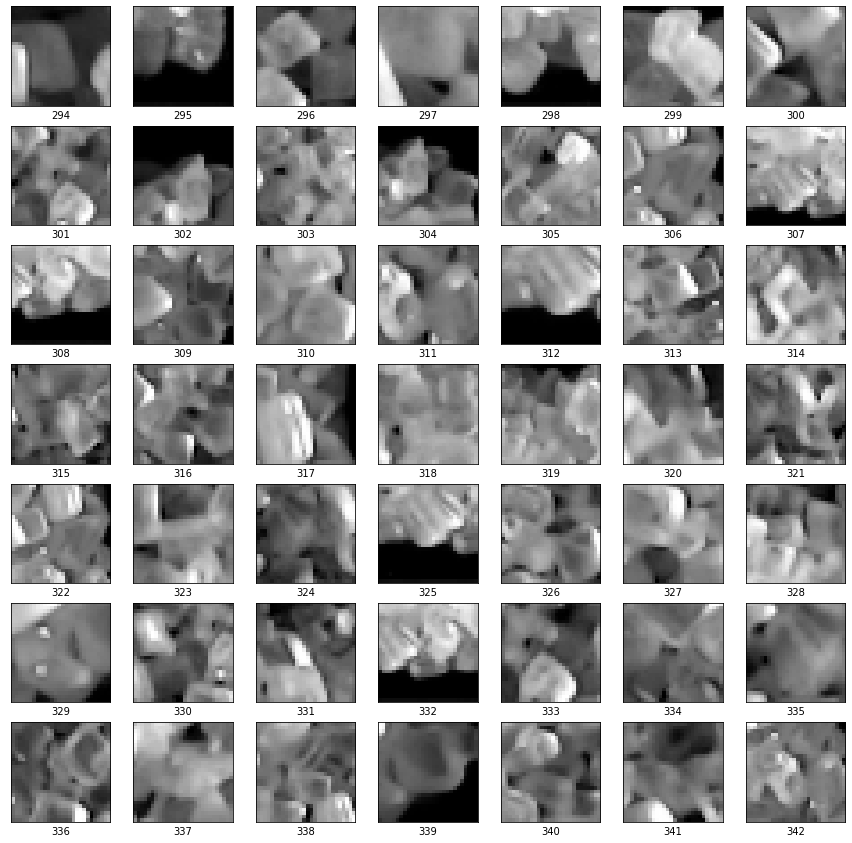

In [26]:
plt.figure(figsize=(15,15))
i=6
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 284

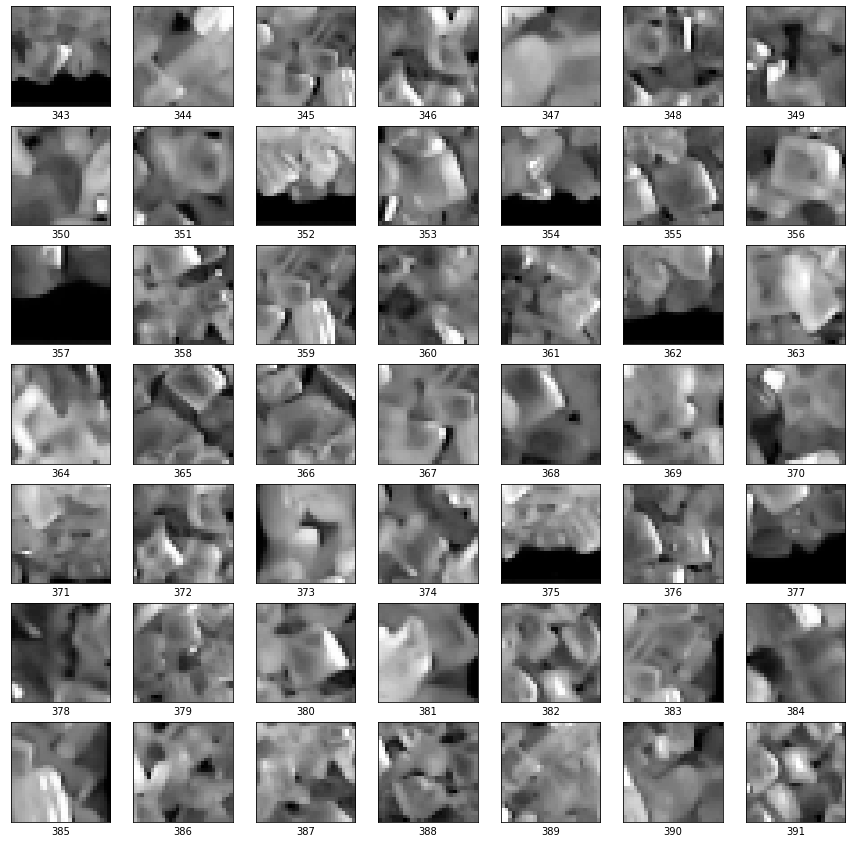

In [27]:
plt.figure(figsize=(15,15))
i=7
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 284

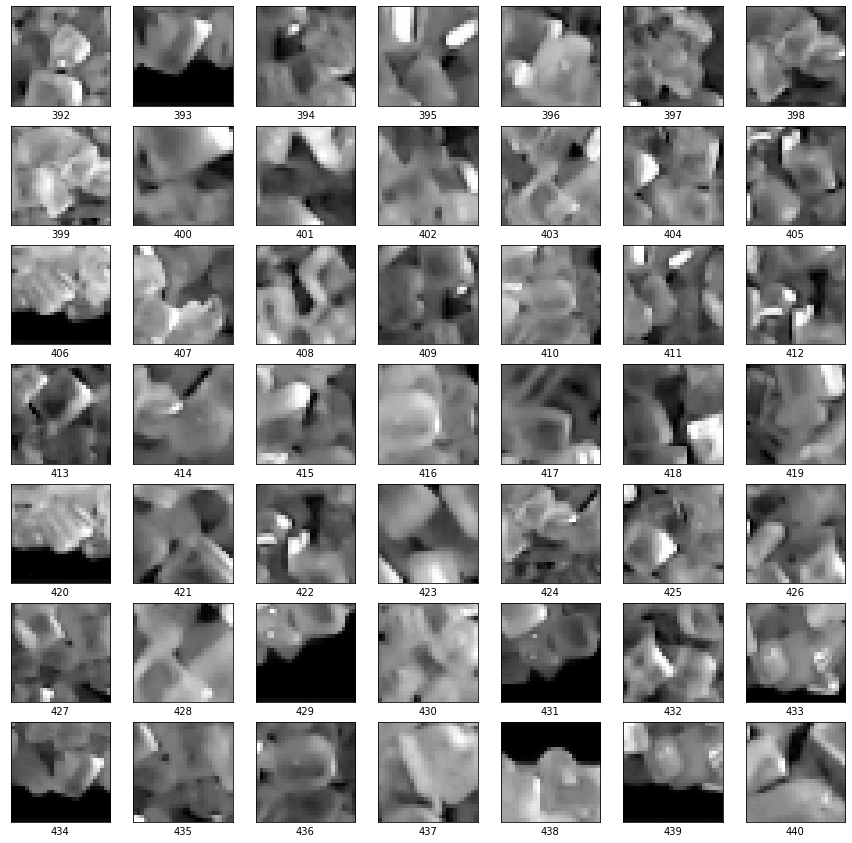

In [28]:
plt.figure(figsize=(15,15))
i=8
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 284

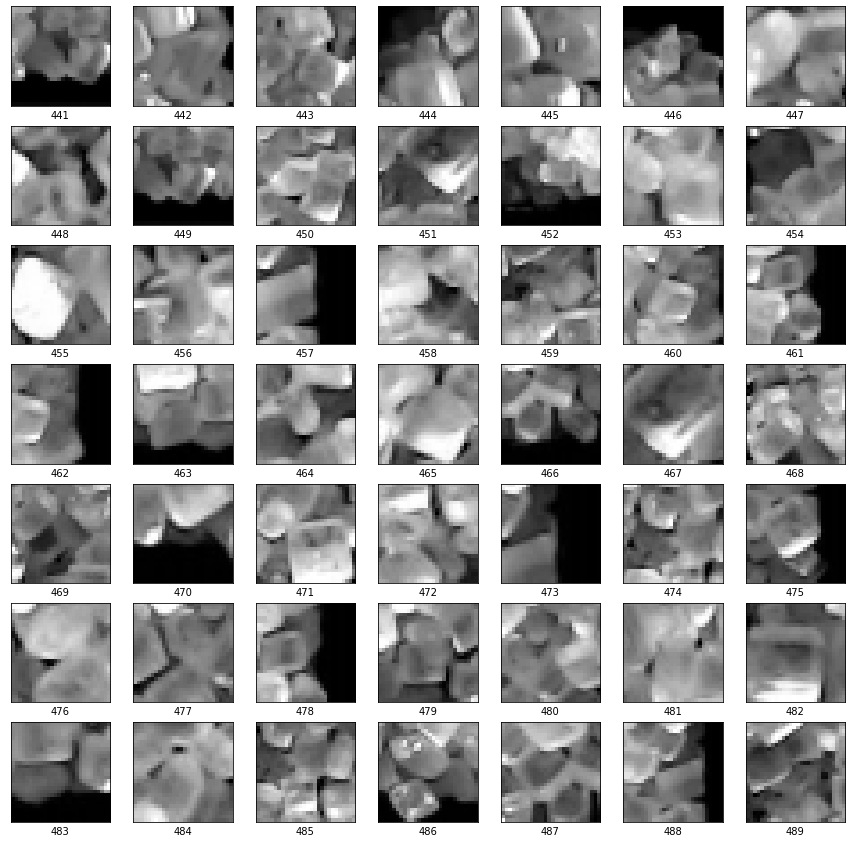

In [29]:
plt.figure(figsize=(15,15))
i=9
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 284

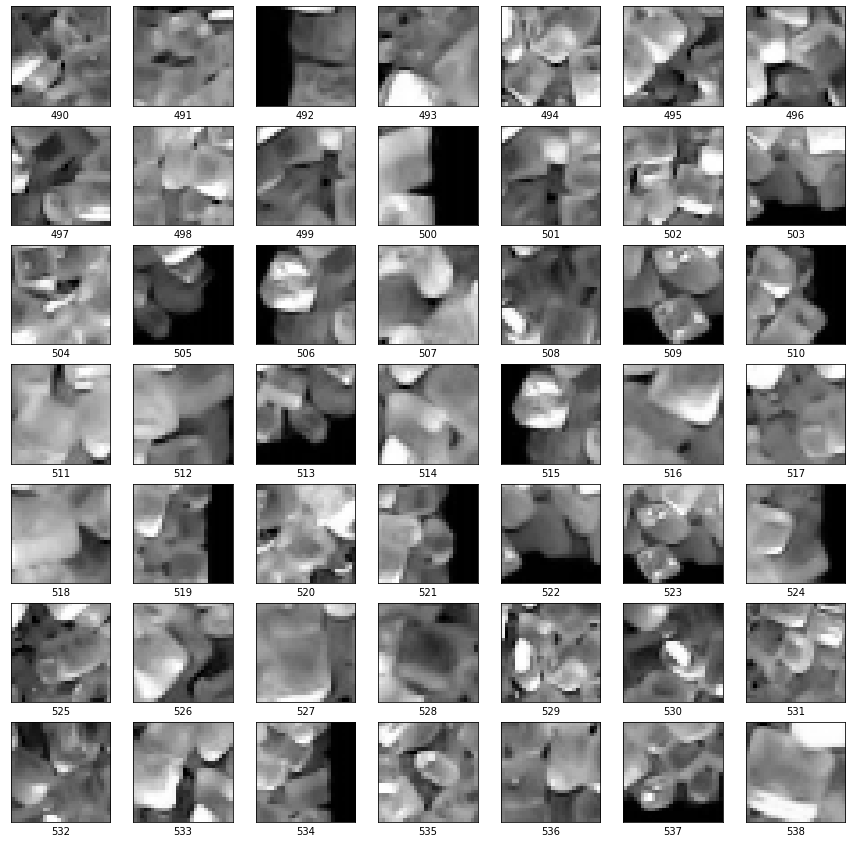

In [30]:
plt.figure(figsize=(15,15))
i=10
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 284

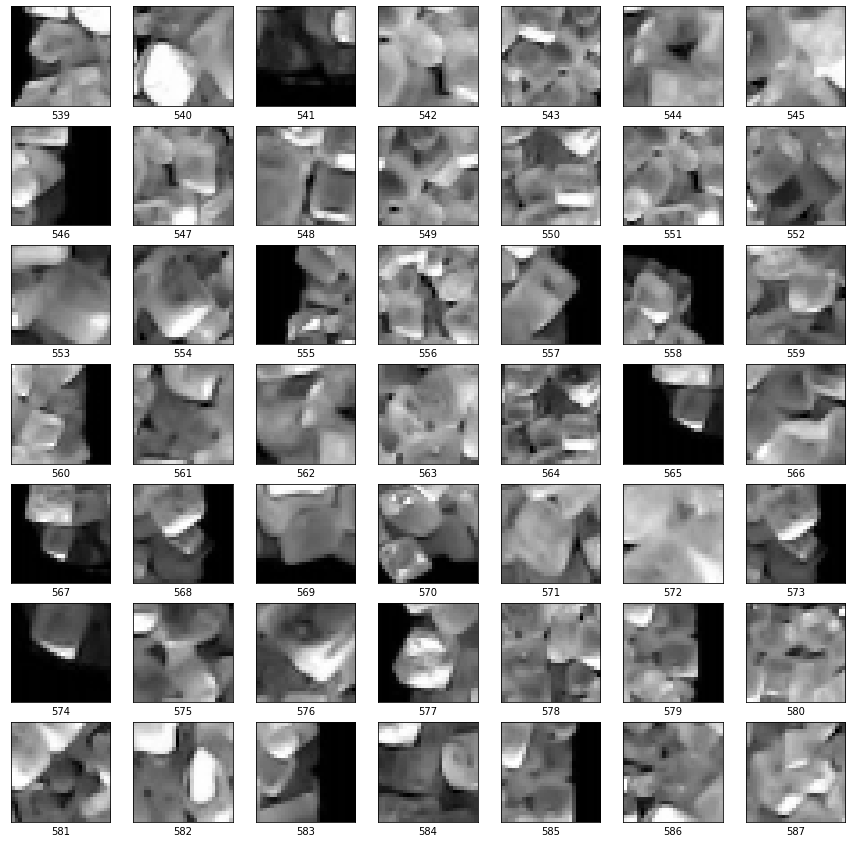

In [31]:
plt.figure(figsize=(15,15))
i=11
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 284

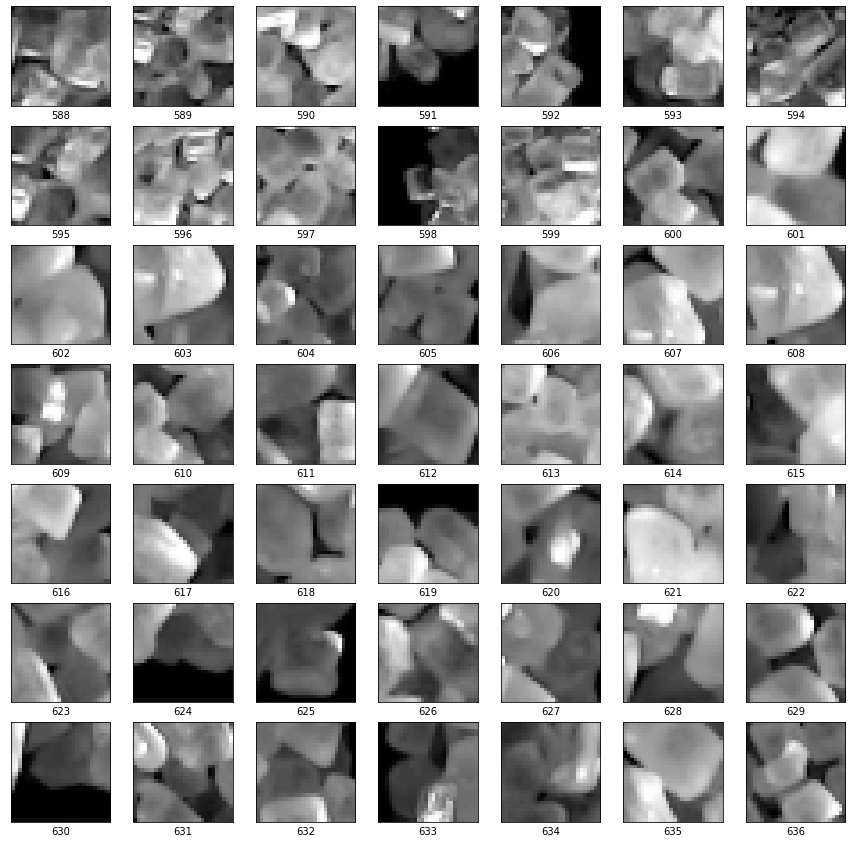

In [32]:
plt.figure(figsize=(15,15))
i=12
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 284

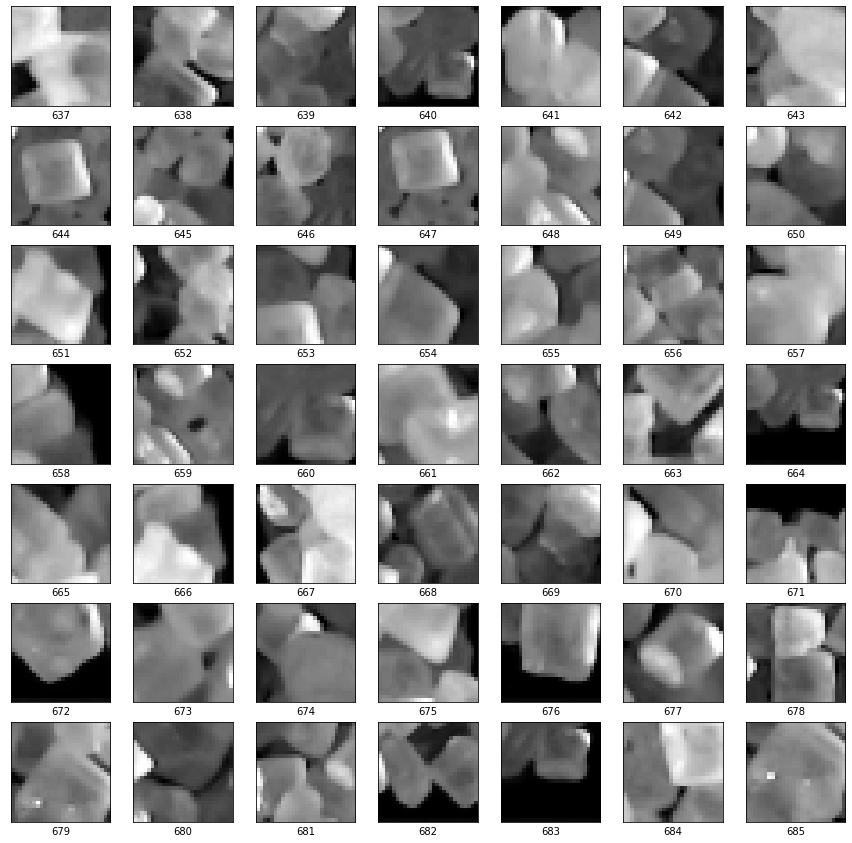

In [33]:
plt.figure(figsize=(15,15))
i=13
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 284

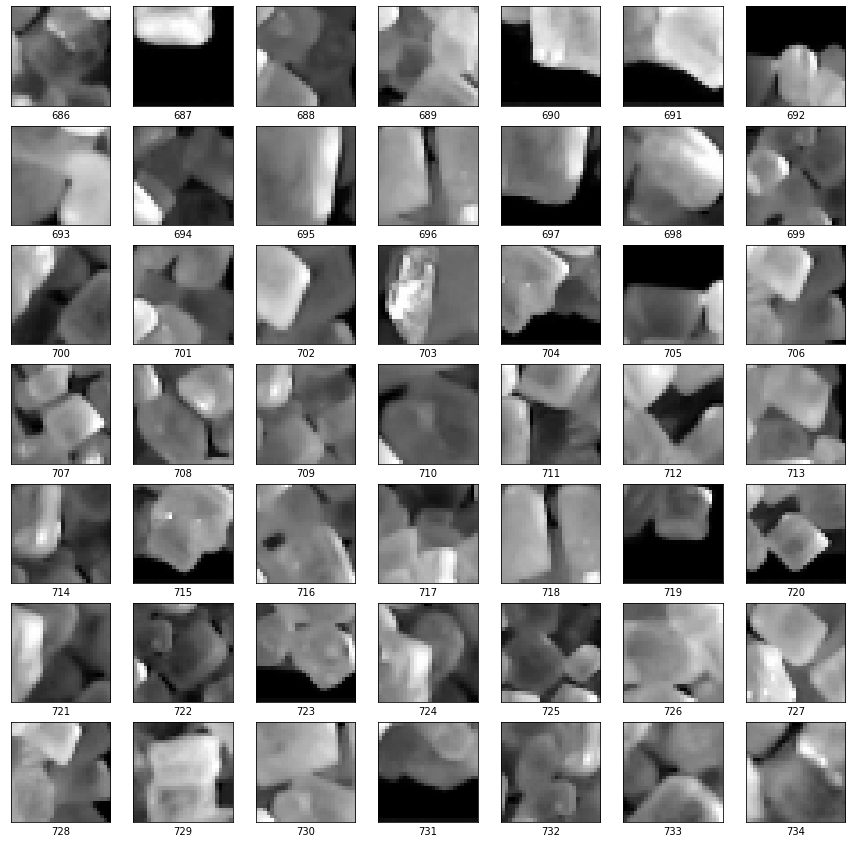

In [34]:
plt.figure(figsize=(15,15))
i=14
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166] # 0 ate 284

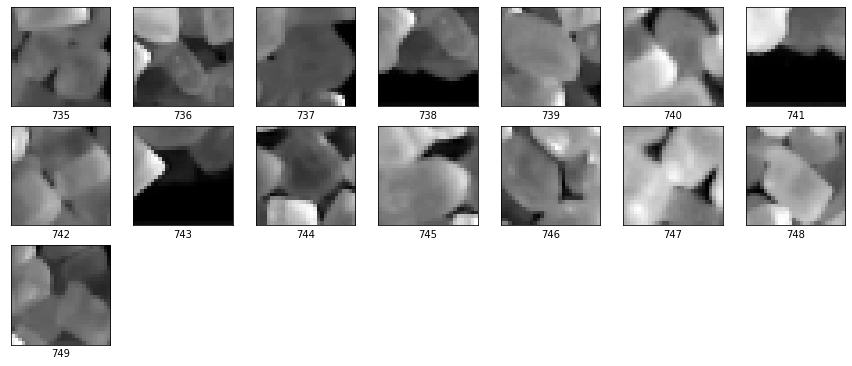

In [35]:
plt.figure(figsize=(15,15))
i=15
Start=735
k=0
for i in range(Start,Start+15):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
#GRAO=[0,146,149,166,217,222,223,257,268.286,455,482,538,612,644,647,651,677] # 0 ate 284

In [36]:
GRAO=[0,146,149,166,217,222,223,257,268,286,455,482,538,612,644,647,651,677] # 0 ate 749
GRAO=np.array(GRAO)
Ind=FotosZ.index
FotosNG=FotosZ.copy()
for i in GRAO:
  print(i)
  FotosNG=FotosNG.drop(Ind[i])

0
146
149
166
217
222
223
257
268
286
455
482
538
612
644
647
651
677


In [37]:
PERCENT=245.0/(len(FotosNG.index))
FotosNG=FotosNG.sample(frac=PERCENT, replace=True)
print(FotosNG)

              0          1          2  ...        781        782        783
901    55.87396   45.59344   39.46885  ...   70.51337   72.93473   69.52957
1144   46.83932   42.25709   43.93006  ...   66.71077   71.89225   79.40832
1044   81.65651   83.32410   88.25484  ...   71.26039   73.88920   73.49584
1382   53.51636   55.72066   64.31305  ...    0.00926    0.83736    1.57388
921    67.12698   69.86228   71.76106  ...  105.32365  118.47552  134.88083
...         ...        ...        ...  ...        ...        ...        ...
1430  107.00000  104.43750  104.93750  ...  180.18750  181.87500  177.81250
992    70.59126   74.64420   78.61712  ...  133.30933  136.31302  134.95506
1230  139.81094  147.36467  151.83160  ...  169.83524  182.73192  203.61673
1516  119.00000  118.88000  117.20000  ...  140.80000  145.31999  144.80000
1273  222.17477  201.23811  179.41783  ...  167.76656  163.52802  159.66577

[245 rows x 784 columns]


In [38]:
#PROXIMO PASSO: Treinar a rede (define o que é grao e o que nao é grao): (nao graos) será treinado com as 245 FotosNG e os (graos) será treinado com os 245 graos de FotosG

In [39]:
#Separar as outras fotos grandes e pedir para o programa segmenta-las 

In [40]:
########### NOT COMPLETELY CHECKED SET 02 2020 ######################

In [41]:
# print(gxw)

In [42]:
print(FotosG.shape)
print(FotosNG.shape)

(245, 784)
(245, 784)


In [43]:
rows,col=FotosG.shape
y_total=[] # grao-->zero, nao grao-->1
for i in range(rows):
  y_total.append(0) #  # grao-->zero
for i in range(rows,(2*rows)):
  y_total.append(1) #  # nao grao-->zero


In [44]:
print(len(y_total))

490


In [45]:
print(len(y_total))

490


In [46]:
frames = [FotosG,FotosNG]
result = pd.concat(frames)

In [47]:
#Define data train and data test

W_train, W_test, yw_train, yw_test = train_test_split(np.array(result), np.array(y_total), 
                                                    test_size=0.30, shuffle=True, 
                                                    random_state=42)

In [48]:
print(len(y_total))
print(len(yw_test))
print(len(yw_train))
A=490*0.3
print(A)

490
147
343
147.0


In [49]:
train_images=W_train #imagens utilizadas para o treino
train_labels=yw_train # resposta esperada para o treino
test_images=W_test
test_labels=yw_test

In [87]:
#print(len(test_labels))
print(test_labels)

[1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1]


In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
# GRAIN use crop photos other cases segmented
model.fit(train_images, train_labels, epochs=200) 

Epoch 1/200
11/11 [==============================] - 0s 3ms/step - loss: 11.8468 - accuracy: 0.4548 
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 1.8991 - accuracy: 0.5277
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 2.7596 - accuracy: 0.4956
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 2.9228 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 2.1397 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9430 - accuracy: 0.5160
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.6793
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.6268
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7784
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.5977
Epoch 1

In [54]:
#ANN das imagens
x=np.array(W_test)
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
#print(prediction)

In [55]:
print(x)

[[ 51.36165  53.01521  55.14182 ... 105.03438 108.19405  99.57587]
 [  0.41074   0.42043   0.42897 ...   0.25581   0.24951   0.25978]
 [131.95209 123.09807 120.92822 ...  93.93042  86.9923   89.1994 ]
 ...
 [  0.31216   0.44951   0.4732  ...   0.58723   0.59295   0.61167]
 [  0.45351   0.43582   0.44749 ...   0.4345    0.43428   0.43798]
 [123.38146  93.44551 110.58072 ... 110.90831 115.25235 117.87874]]


In [56]:
y_valor=np.copy(yw_test)
data = {'y_Actual': y_valor,
        'y_Predicted': prediction
        }  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#print (df)

In [57]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0   1
Actual           
0          72   0
1           3  72


In [58]:
y_true = df['y_Actual']
y_pred = df['y_Predicted']
print(sklearn.metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.96      0.98        75

    accuracy                           0.98       147
   macro avg       0.98      0.98      0.98       147
weighted avg       0.98      0.98      0.98       147



In [59]:
print(gxw)

# Third step: testing ANN other segmented images

In [60]:
!git clone https://github.com/ucfilho/marquesgabi_August_2020
%cd marquesgabi_August_2020

Cloning into 'marquesgabi_August_2020'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 57 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.
/content/Doutorado/marquesgabi_August_2020


In [61]:
Transfere='img28_all00.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [62]:
labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

In [63]:
df=pd.read_csv(labels[0])
print(df.shape)

(150, 787)


In [64]:
df=pd.read_csv(labels[0])
Width_All=df['Width']
df=df.drop(['Unnamed: 0','Type','Width'], axis=1)
print(df.head())

          0         1         2  ...        781       782       783
0  61.14508  60.20605  63.89233  ...   87.26298  86.56084  70.53898
1  54.96550  56.12730  56.46103  ...    6.09697   6.10529   6.17609
2  81.32749  86.75936  93.59119  ...  104.26302  98.95892  98.95303
3   0.39589   0.51145   0.68329  ...   60.38241  58.77369  57.35922
4  48.26560  49.34269  51.20098  ...   86.94305  86.16422  92.14825

[5 rows x 784 columns]


# Fourth step test ANN for data to be used for PSD (Particle size distribution) determination

In [65]:
# Mahotas used: marquesgabi_fev_2020/02_Mahotas_fracionado_fev_20_2020.ipynb

In [66]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/Doutorado/marquesgabi_August_2020/marquesgabi_fev_2020


In [67]:
import mahotas.features.texture as mht
import mahotas.features
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy import stats
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy import integrate
import re
import Go2BlackWhite
import Go2Mahotas

In [68]:

Escolha=['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 
         'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 
         'IMC1', 'IMC2']

Prop=Escolha[1] # Propriedade a escolher para ter picos, largura de pico, proeminencia,...

In [69]:
#ANN das imagens
x=np.array(df)
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
#print(prediction)

In [70]:
y=np.array(prediction)
Num=len(y)
print(Num)

150


In [71]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


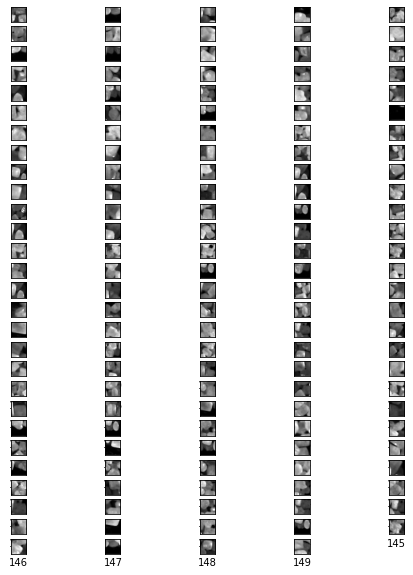

In [72]:
# select just the grains to show picture
grain=[]
Mahotas_Prop=[]
Todas_Fotos=[] 

img28_all=pd.DataFrame(x)
Width_Grain_2=[]

Size=28 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
#Row_Crop=1/3 # posicao do corte
Crop=int(Size*Row_Crop)


for i in range(Num):
  if(y[i]==1):
    grain.append(i)
    Width_Grain_2.append(Width_All[i])

cont=0 # 
cols=5
rows=int(len(grain)/cols)+1
Grao_in_All28=[]

for i in range(Num):
  if(y[i]==1):
    Grao_in_All28.append(i)
    cont=cont+1
    plt.subplot(rows,cols,cont) # subplot not allow cont=0
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    Foto=np.array(img28_all.iloc[i]).reshape(28,28)
    plt.imshow(Foto, cmap = "gray")
    plt.xlabel(i)

    Prop_Escolhida=[]
    
    # p_foto=ww[k].reshape(Size,Size)
    p_foto=Foto
    GLCM=[]
    glcm_haralick=[]
    x_ref=[]
    Count=Sub_Size
    p=np.zeros((Sub_Size,Sub_Size))
    j_ref=0
    Cada_foto=[]
    Posicao_X=[]
    Posicao_Y=[]
    for k in range(Size):
      if((k+Sub_Size-1)<Size):
        #print("(k+Sub_Size)=",(k+Sub_Size),"k=",k)
        for i in range(Sub_Size):
          Posicao_X.append(Crop+i)
          for j in range(Sub_Size):
            p[i,j]=p_foto[Crop+i,j+k]
            Posicao_Y.append(j+k)

        WW=np.copy(p) 
        Cada_foto.append(WW.ravel())
        x_ref.append(Count-Sub_Size)
        Count=Count+1
      
        Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Escolha)
        Prop_Escolhida.append(Mahotas[Prop].mean())

    Todas_Fotos.append(Prop_Escolhida)

df_mahotas=pd.DataFrame(Todas_Fotos)

plt.subplots_adjust(bottom=0.1, right=1.2, top=2,hspace=0.3, wspace=0.1)

In [73]:
Features_Total=[]
cont=-1
for i in range(Num):
  if(y[i]==1):
    cont=cont+1
    x_psd=df_mahotas.iloc[cont]
    peaks, rr = find_peaks(x_psd, height=0)

    N_peaks=len(peaks)
    prominences = peak_prominences(x_psd, peaks)
    
    #Area = simps(x, dx=1)
    Area = integrate.simps(x_psd, dx=1)
    if(len(peaks)==0):
      Width_peaks =0
      Width_peaks_max =0
      Width_peaks_min =0
      Media_proem=0    
    else:
      Width_peaks =np.mean(peak_widths(x_psd, peaks, rel_height=0.5))
      Width_peaks_max =np.max(peak_widths(x_psd, peaks, rel_height=0.5))
      Width_peaks_min =np.min(peak_widths(x_psd, peaks, rel_height=0.5))
      Media_proem=np.mean(prominences)
    Median = np.median(x_psd)
    Mode= stats.mode(x_psd)[0]
    Mean=np.mean(x_psd)
    Sd=np.std(x_psd)

    Features=[]
    Features.append(N_peaks)
    Features.append(Media_proem )
    Features.append(Area)
    Features.append(Width_peaks )
    Features.append(Width_peaks_max)
    Features.append(Width_peaks_min)
    Features.append(Median )
    Features.append(Mode[0])
    Features.append(Mean)
    Features.append(Sd)

    Features_Total.append(Features)

Nomes_PSD=['N_peaks','Media_proem','Area','Width_peaks','Width_peaks_max',
                    'Width_peaks_min','Median','Mode','Mean','Sd'] 
  
Features_Total=pd.DataFrame(Features_Total,columns=Nomes_PSD)
    
print(Features_Total)
# Features_total represents properties without considering there is no class 
# Features_total describes all grains found by the ANN

     N_peaks  Media_proem          Area  ...       Mode        Mean          Sd
0          3   124.735764  10528.340365  ...  61.996875  453.938672  367.406132
1          2    24.531250   2138.987760  ...   2.190625   96.657943  104.038698
2          2    94.216667   3924.049219  ...  42.065625  164.519271  118.888357
3          2    57.968229   1478.800781  ...   3.118750   62.194531   84.456814
4          3    46.171528   2638.307031  ...  10.440625  112.468620   98.349696
..       ...          ...           ...  ...        ...         ...         ...
134        3    61.719097   2459.586458  ...   2.053125  102.776562  141.900251
135        2   117.259375   3291.803125  ...   3.043750  137.685547  212.707613
136        2    24.342708   2224.358854  ...  17.643750  101.174479   81.100132
137        2   301.007812   9600.669792  ...   6.568750  401.566016  385.889391
138        2    12.843750    809.874479  ...   3.900000   35.745443   20.954493

[139 rows x 10 columns]


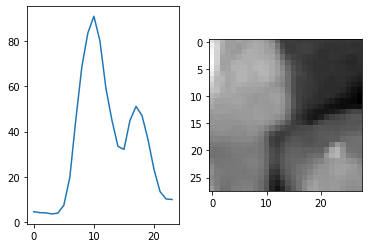

In [74]:
rows=1;cols=2
k=8
plt.subplot(rows,cols,1)
plt.plot(df_mahotas.iloc[k])
Foto=np.array(img28_all.iloc[Grao_in_All28[k]]).reshape(28,28)
plt.subplot(rows,cols,2)
plt.imshow(Foto, cmap = "gray")

In [75]:
print(Width_Grain_2)

[169, 164, 109, 103, 199, 141, 125, 106, 108, 106, 140, 153, 114, 102, 189, 115, 113, 140, 147, 168, 111, 161, 197, 135, 114, 133, 128, 141, 137, 107, 131, 100, 116, 189, 176, 135, 111, 131, 166, 152, 193, 111, 141, 177, 133, 113, 110, 144, 127, 196, 192, 114, 126, 200, 139, 131, 129, 199, 166, 179, 145, 195, 176, 197, 187, 185, 154, 194, 160, 114, 157, 101, 120, 161, 126, 116, 163, 159, 189, 137, 118, 152, 146, 197, 190, 119, 180, 174, 193, 170, 149, 199, 185, 103, 114, 174, 171, 154, 134, 141, 115, 188, 171, 175, 123, 123, 194, 189, 114, 170, 190, 130, 171, 131, 115, 167, 199, 124, 121, 122, 170, 134, 179, 191, 165, 141, 126, 184, 187, 180, 114, 100, 174, 196, 179, 142, 176, 178, 103]


In [76]:
Width_Grain=Width_All.iloc[grain]

In [77]:
Width_Grain=np.array(Width_Grain) # passando de Serie (dataframe 1d) para np.array
print(Width_Grain) 


[169 164 109 103 199 141 125 106 108 106 140 153 114 102 189 115 113 140
 147 168 111 161 197 135 114 133 128 141 137 107 131 100 116 189 176 135
 111 131 166 152 193 111 141 177 133 113 110 144 127 196 192 114 126 200
 139 131 129 199 166 179 145 195 176 197 187 185 154 194 160 114 157 101
 120 161 126 116 163 159 189 137 118 152 146 197 190 119 180 174 193 170
 149 199 185 103 114 174 171 154 134 141 115 188 171 175 123 123 194 189
 114 170 190 130 171 131 115 167 199 124 121 122 170 134 179 191 165 141
 126 184 187 180 114 100 174 196 179 142 176 178 103]


In [78]:
print(Width_Grain_2) # lista : tem virgula entre os elementos

[169, 164, 109, 103, 199, 141, 125, 106, 108, 106, 140, 153, 114, 102, 189, 115, 113, 140, 147, 168, 111, 161, 197, 135, 114, 133, 128, 141, 137, 107, 131, 100, 116, 189, 176, 135, 111, 131, 166, 152, 193, 111, 141, 177, 133, 113, 110, 144, 127, 196, 192, 114, 126, 200, 139, 131, 129, 199, 166, 179, 145, 195, 176, 197, 187, 185, 154, 194, 160, 114, 157, 101, 120, 161, 126, 116, 163, 159, 189, 137, 118, 152, 146, 197, 190, 119, 180, 174, 193, 170, 149, 199, 185, 103, 114, 174, 171, 154, 134, 141, 115, 188, 171, 175, 123, 123, 194, 189, 114, 170, 190, 130, 171, 131, 115, 167, 199, 124, 121, 122, 170, 134, 179, 191, 165, 141, 126, 184, 187, 180, 114, 100, 174, 196, 179, 142, 176, 178, 103]


# Fifth step create classes

In [79]:
Width_bounds=[100,200]
N_Class=4
Class=[]
a=Width_bounds[0]
b=Width_bounds[1]
delta_ab=(b-a)/N_Class
for i in range(N_Class-1):
  valor=a+delta_ab*(i+1)
  Class.append(valor)

print(Class)


[125.0, 150.0, 175.0]


In [80]:
Num=len(Width_Grain)
count=[0,0,0,0]
Hist_Width=[]
for i in range(Num):
  if(Width_Grain[i]<Class[0]):
    count[0]=count[0]+1
    Hist_Width.append(0)
  elif(Width_Grain[i]<Class[1]):
    count[1]=count[1]+1
    Hist_Width.append(1)
  elif(Width_Grain[i]<Class[2]):
    count[2]=count[2]+1
    Hist_Width.append(2)
  else:
    count[3]=count[3]+1
    Hist_Width.append(3)

print(count)
N_count=np.copy(count)

Nomes_class=['until_w1','w1-w2','w2-w3','bigger-w3']+Nomes_PSD

[38, 34, 27, 40]


In [81]:
print(Hist_Width)

[2, 2, 0, 0, 3, 1, 1, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 1, 1, 2, 0, 2, 3, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 3, 3, 1, 0, 1, 2, 2, 3, 0, 1, 3, 1, 0, 0, 1, 1, 3, 3, 0, 1, 3, 1, 1, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 2, 3, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 3, 1, 0, 2, 1, 3, 3, 0, 3, 2, 3, 2, 1, 3, 3, 0, 0, 2, 2, 2, 1, 1, 0, 3, 2, 3, 0, 0, 3, 3, 0, 2, 3, 1, 2, 1, 0, 2, 3, 0, 0, 0, 2, 1, 3, 3, 2, 1, 1, 3, 3, 3, 0, 0, 2, 3, 3, 1, 3, 3, 0]


In [82]:
print(Features_Total.iloc[0,1])

124.7357638888889


In [83]:
rows=len(Width_Grain)
cols=len(Nomes_PSD)
Features_Class=np.zeros((4,cols)) # matrix containing average values stored. Each line is reprenting a different class

for i in range(rows):
  k=Hist_Width[i]
  for j in range(cols):  
    Features_Class[k,j]=Features_Class[k,j]+ Features_Total.iloc[i,j]

print(pd.DataFrame(Features_Class,columns=Nomes_PSD))

   N_peaks  Media_proem           Area  ...       Mode         Mean           Sd
0     94.0  1863.467622   80920.418490  ...  238.60000  3576.767448  5350.592371
1     84.0  1715.274306   94583.253125  ...  182.85000  4095.501302  4171.296993
2     65.0  2430.280069  127326.160677  ...  355.25625  5547.487630  5452.567393
3    102.0  3900.925781  191238.395573  ...  832.17500  8208.663802  8472.601513

[4 rows x 10 columns]


In [84]:
for i in range(4):
  if(N_count[i]==0):
    fator=0
  else:
    fator=1/N_count[i]
  Features_Class[i,:]=Features_Class[i,:]*fator
print(pd.DataFrame(Features_Class,columns=Nomes_PSD))

    N_peaks  Media_proem         Area  ...       Mode        Mean          Sd
0  2.473684    49.038622  2129.484697  ...   6.278947   94.125459  140.805062
1  2.470588    50.449244  2781.860386  ...   5.377941  120.455921  122.685206
2  2.407407    90.010373  4715.783729  ...  13.157639  205.462505  201.946940
3  2.550000    97.523145  4780.959889  ...  20.804375  205.216595  211.815038

[4 rows x 10 columns]


In [85]:
print(N_count)

[38 34 27 40]
